This notebook is intended to test the mavenn functionality which enables the computation of parameter uncertainties via inference on simulated data

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import time
import tensorflow as tf
from tensorflow.keras.backend import get_value
%matplotlib inline

# Insert mavenn at beginning of path
import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh/'
sys.path.insert(0, path_to_mavenn_local)

#Load mavenn and check path
import mavenn
print(mavenn.__path__)

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('mpsa')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 6,078
training + validation N: 24,405


,set,tot_ct,ex_ct,y,x
0,training,28,2,0.023406,GGAGUGAUG
1,training,193,15,-0.074999,UUCGCGCCA
2,training,27,0,-0.438475,UAAGCUUUU
3,training,130,2,-0.631467,AUGGUCGGG
4,training,552,19,-0.433012,AGGGCAGGA
5,training,216,6,-0.482679,GGUGUCUGU
6,validation,88,4,-0.241737,CAGGCAAAC
7,training,14,0,-0.167408,CAUGCAGCU
8,training,170,14,-0.048222,CAAGUCACU
9,training,242,13,-0.230795,UCCGCGCUA


In [3]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(L=L,
                     alphabet='rna',
                     gpmap_type='additive', 
                     regression_type='GE',
                     ge_noise_model_type='Gaussian',
                     ge_heteroskedasticity_order=2)

In [4]:
x_train = data_df['x'].values
y_train = data_df['y'].values

In [5]:
# Set training data
model.set_data(x=x_train,
               y=y_train,
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

N = 24,405 observations set as training data.
Using 24.3% for validation.
Data shuffled.
Time to set data: 0.416 sec.


In [6]:
# Fit model to data
model.fit(learning_rate=.001,
          epochs=300,
          batch_size=200,
          early_stopping=True,
          early_stopping_patience=30,
          try_tqdm = False,
          linear_initialization=True,
          verbose=True)

 
LSMR            Least-squares solution of  Ax = b

The matrix A has    18469 rows  and       36 cols
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =       36

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  1.366e+02  4.493e+03   1.0e+00  2.4e-01
     1  8.98645e-03  1.242e+02  1.509e+03   9.1e-01  1.5e-01  7.8e+01  1.0e+00
     2  7.33027e-03  1.235e+02  1.209e+03   9.0e-01  7.3e-02  1.3e+02  1.2e+00
     3  8.73072e-03  1.226e+02  5.112e+01   9.0e-01  1.5e-03  2.7e+02  2.0e+00
     4  8.01470e-03  1.226e+02  4.502e+00   9.0e-01  1.3e-04  2.8e+02  2.4e+00
     5  8.05427e-03  1.226e+02  3.149e-01   9.0e-01  8.9e-06  2.9e+02  2.6e+00
     6  8.04559e-03  1.226e+02  9.714e-03   9.0e-01  2.7e-07  3.0e+02  2.6e+00
 
LSMR finished
The least-squares solution is good enough, given atol     
istop =       2    normr = 1.2e+02
    normA = 3.0e+02    normAr = 9.7e-03
itn

Epoch 51/300
93/93 [==============================] - 0s 2ms/step - loss: 195.0060 - I_var: -0.0176 - val_loss: 188.9889 - val_I_var: 0.0216
Epoch 52/300
93/93 [==============================] - 0s 2ms/step - loss: 194.1257 - I_var: -0.0156 - val_loss: 189.0672 - val_I_var: 0.0210
Epoch 53/300
93/93 [==============================] - 0s 2ms/step - loss: 197.4982 - I_var: -0.0142 - val_loss: 188.8676 - val_I_var: 0.0225
Epoch 54/300
93/93 [==============================] - 0s 2ms/step - loss: 196.2687 - I_var: -0.0155 - val_loss: 188.7622 - val_I_var: 0.0232
Epoch 55/300
93/93 [==============================] - 0s 2ms/step - loss: 195.4875 - I_var: -0.0134 - val_loss: 188.7062 - val_I_var: 0.0236
Epoch 56/300
93/93 [==============================] - 0s 2ms/step - loss: 195.1026 - I_var: -0.0158 - val_loss: 188.7449 - val_I_var: 0.0234
Epoch 57/300
93/93 [==============================] - 0s 2ms/step - loss: 195.9080 - I_var: -0.0139 - val_loss: 188.6055 - val_I_var: 0.0242
Epoch 58/300


93/93 [==============================] - 0s 2ms/step - loss: 191.5728 - I_var: 0.0092 - val_loss: 185.2287 - val_I_var: 0.0471
Epoch 110/300
93/93 [==============================] - 0s 2ms/step - loss: 189.0203 - I_var: 0.0042 - val_loss: 185.2117 - val_I_var: 0.0472
Epoch 111/300
93/93 [==============================] - 0s 2ms/step - loss: 188.2035 - I_var: 0.0071 - val_loss: 185.1590 - val_I_var: 0.0476
Epoch 112/300
93/93 [==============================] - 0s 2ms/step - loss: 191.7940 - I_var: 0.0114 - val_loss: 185.0703 - val_I_var: 0.0482
Epoch 113/300
93/93 [==============================] - 0s 2ms/step - loss: 188.8269 - I_var: 0.0112 - val_loss: 185.1031 - val_I_var: 0.0478
Epoch 114/300
93/93 [==============================] - 0s 2ms/step - loss: 193.5396 - I_var: 0.0124 - val_loss: 184.9377 - val_I_var: 0.0491
Epoch 115/300
93/93 [==============================] - 0s 2ms/step - loss: 192.8369 - I_var: 0.0091 - val_loss: 184.9450 - val_I_var: 0.0491
Epoch 116/300
93/93 [======

93/93 [==============================] - 0s 2ms/step - loss: 183.4941 - I_var: 0.0634 - val_loss: 177.2423 - val_I_var: 0.1026
Epoch 226/300
93/93 [==============================] - 0s 2ms/step - loss: 182.3580 - I_var: 0.0622 - val_loss: 177.2886 - val_I_var: 0.1021
Epoch 227/300
93/93 [==============================] - 0s 2ms/step - loss: 183.7714 - I_var: 0.0625 - val_loss: 177.1031 - val_I_var: 0.1036
Epoch 228/300
93/93 [==============================] - 0s 2ms/step - loss: 178.7387 - I_var: 0.0642 - val_loss: 177.2078 - val_I_var: 0.1027
Epoch 229/300
93/93 [==============================] - 0s 2ms/step - loss: 183.9588 - I_var: 0.0591 - val_loss: 177.1442 - val_I_var: 0.1032
Epoch 230/300
93/93 [==============================] - 0s 3ms/step - loss: 187.2152 - I_var: 0.0613 - val_loss: 177.1155 - val_I_var: 0.1034
Epoch 231/300
93/93 [==============================] - 0s 2ms/step - loss: 182.9158 - I_var: 0.0620 - val_loss: 177.3642 - val_I_var: 0.1016
Epoch 232/300
93/93 [======

In [7]:
model.fit_args

{'fit_kwargs': {},
 'optimizer_kwargs': {'learning_rate': 0.001},
 'optimizer': 'Adam',
 'try_tqdm': False,
 'freeze_theta': False,
 'linear_initialization': True,
 'batch_size': 200,
 'early_stopping_patience': 30,
 'early_stopping': True,
 'verbose': True,
 'validation_split': 0.2,
 'learning_rate': 0.001,
 'epochs': 300}

In [8]:
# # Save model
model.save('mpsa_ge_additive')

Model saved to these files:
	mpsa_ge_additive.pickle
	mpsa_ge_additive.h5


In [6]:
# Load model
model = mavenn.load('mpsa_ge_additive')

Model loaded from these files:
	mpsa_ge_additive.pickle
	mpsa_ge_additive.h5


In [7]:
model.fit_args

{'fit_kwargs': {},
 'optimizer_kwargs': {'learning_rate': 0.001},
 'optimizer': 'Adam',
 'try_tqdm': False,
 'freeze_theta': False,
 'linear_initialization': True,
 'batch_size': 200,
 'early_stopping_patience': 30,
 'early_stopping': True,
 'verbose': True,
 'validation_split': 0.2,
 'learning_rate': 0.001,
 'epochs': 300}

In [8]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values

On test data:
I_var_test: 0.061 +- 0.033 bits
I_pred_test: 0.235 +- 0.011 bits


Text(0.5, 1.0, 'training hisotry')

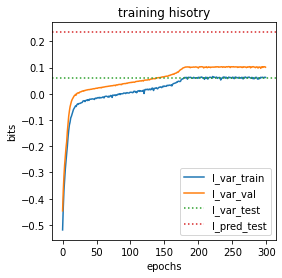

In [9]:
# Show training history
print('On test data:')

# Compute variational information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
#ax.set_ylim([0, I_pred*1.2]);

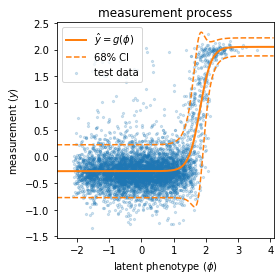

In [10]:
# Predict latent phentoype values (phi) on test data
phi_test = model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()

In [11]:
# Set training data
model.set_data(x=x_train,
               y=y_train,
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

N = 24,405 observations set as training data.
Using 24.3% for validation.
Data shuffled.
Time to set data: 0.397 sec.


In [12]:
model.simulate_dataset(data_df)

,set,phi,yhat,y,x
0,training,0.441977,-0.275595,-0.765854,GGAGUGAUG
1,training,-1.443627,-0.276442,-0.702025,UUCGCGCCA
2,training,-1.115150,-0.276442,-0.977038,UAAGCUUUU
3,training,1.237482,-0.197217,-0.358565,AUGGUCGGG
4,training,0.879987,-0.265986,0.078893,AGGGCAGGA
...,...,...,...,...,...
24400,training,2.588209,2.025023,1.975701,GAGGUAAAU
24401,training,-0.524296,-0.276439,-0.294053,AUCGCUAGA
24402,training,0.472939,-0.275430,0.013817,CUGGUUGCA
24403,training,-0.549514,-0.276439,-0.396826,CGCGCACAA


In [13]:
#uncertainty_dict = model.compute_parameter_uncertainties(num_simulations=2)
sim_models = model.sample_plausible_models(data_df=data_df,num_models=2,initialize_from_fit_model=True)

Training set   :   18,469 observations (  75.68%)
Validation set :    5,936 observations (  24.32%)
Test set       :        0 observations (   0.00%)
-------------------------------------------------
Total dataset  :   24,405 observations ( 100.00%)

training model 0 ...
N = 24,405 observations set as training data.
Using 24.3% for validation.
Data shuffled.
Time to set data: 0.403 sec.
Epoch 1/300
93/93 [==============================] - 2s 9ms/step - loss: 187.3515 - I_var: 0.2976 - val_loss: 185.0135 - val_I_var: 0.3017
Epoch 2/300
93/93 [==============================] - 0s 2ms/step - loss: 188.5609 - I_var: 0.2990 - val_loss: 185.1727 - val_I_var: 0.3006
Epoch 3/300
93/93 [==============================] - 0s 2ms/step - loss: 187.7913 - I_var: 0.2949 - val_loss: 185.1055 - val_I_var: 0.3010
Epoch 4/300
93/93 [==============================] - 0s 2ms/step - loss: 188.9259 - I_var: 0.2959 - val_loss: 185.0397 - val_I_var: 0.3015
Epoch 5/300
93/93 [==============================] - 0

Epoch 23/300
93/93 [==============================] - 0s 2ms/step - loss: 185.9221 - I_var: 0.2931 - val_loss: 184.7775 - val_I_var: 0.2854
Epoch 24/300
93/93 [==============================] - 0s 2ms/step - loss: 187.4342 - I_var: 0.2924 - val_loss: 185.1109 - val_I_var: 0.2829
Epoch 25/300
93/93 [==============================] - 0s 2ms/step - loss: 186.2859 - I_var: 0.2924 - val_loss: 184.7643 - val_I_var: 0.2855
Epoch 26/300
93/93 [==============================] - 0s 2ms/step - loss: 184.5287 - I_var: 0.2925 - val_loss: 184.9247 - val_I_var: 0.2844
Epoch 27/300
93/93 [==============================] - 0s 2ms/step - loss: 185.9308 - I_var: 0.2933 - val_loss: 184.7113 - val_I_var: 0.2859
Epoch 28/300
93/93 [==============================] - 0s 2ms/step - loss: 184.8005 - I_var: 0.2929 - val_loss: 184.8488 - val_I_var: 0.2849
Epoch 29/300
93/93 [==============================] - 0s 2ms/step - loss: 185.3484 - I_var: 0.2924 - val_loss: 184.9114 - val_I_var: 0.2843
Epoch 30/300
93/93 [

In [14]:
sim_models